##  Heart Disease Prediction using Machine Learning.

### 1. Problem Statement:-
* **The Objective of this project is to build an Model so that from Given clinical parameters about a patient to predict whether they have heart Disease or not**.

### 2. Data:- 

* The Data is taken from the Kaggle dataset.
* https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### 3.Features:-

- age
- sex-(Male and Female).
- cp-chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
   the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect, 2 = reversable defect.

- **target  1 = has heart disease** 

-         **0 = No heart disease** 

### Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency according with sex column.

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

- Target value = 1 means the person has heart disease.
- Target value = 0 means the person doesn't have heart disease.

<AxesSubplot:xlabel='target', ylabel='count'>

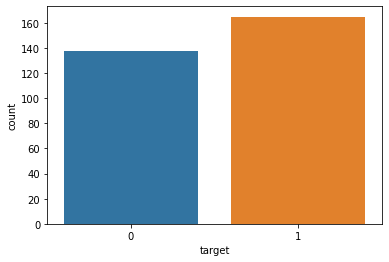

In [10]:
sns.countplot(x='target',data=df)

In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

- where 1 = Male
- where 0 = Female

In [12]:
### Compare target column with sex column.
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


- From the above table we can observe that based on the existing data **out of 96 females around 72 females are having heart Disease**. 
- From the above table we can observe that based on the existing data **out of 207 males around 93 males are having heart disease**.

<AxesSubplot:xlabel='target', ylabel='count'>

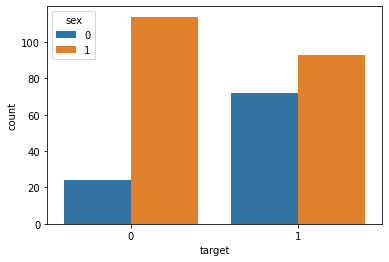

In [13]:
sns.countplot('target',hue='sex',data=df)

### Age vs Max Heart Rate for Heart Disease.

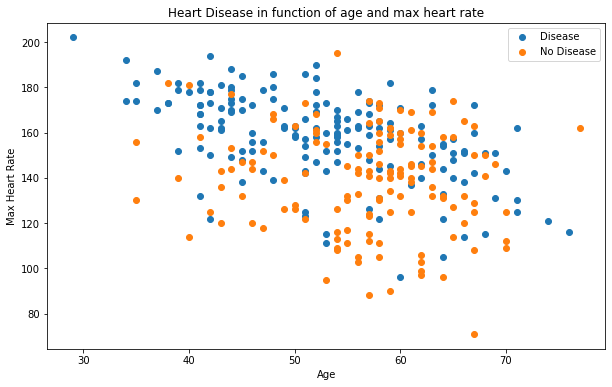

In [14]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1])

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0])

plt.title('Heart Disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

- From the above Graph we can conclude that the people with low age ranges (30-40) have high Heart Rate's.

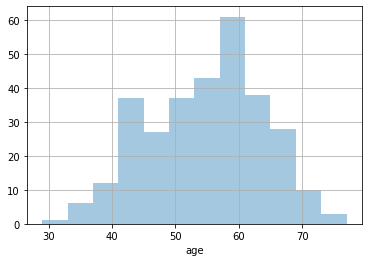

In [15]:
sns.distplot(df['age'],kde=False)
plt.grid()

In [16]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


### Chest Pain vs Target for Heart Disease. 

<AxesSubplot:xlabel='target', ylabel='count'>

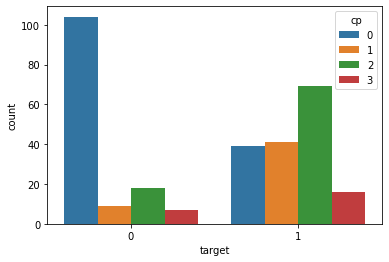

In [18]:
sns.countplot('target',hue='cp',data=df)

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


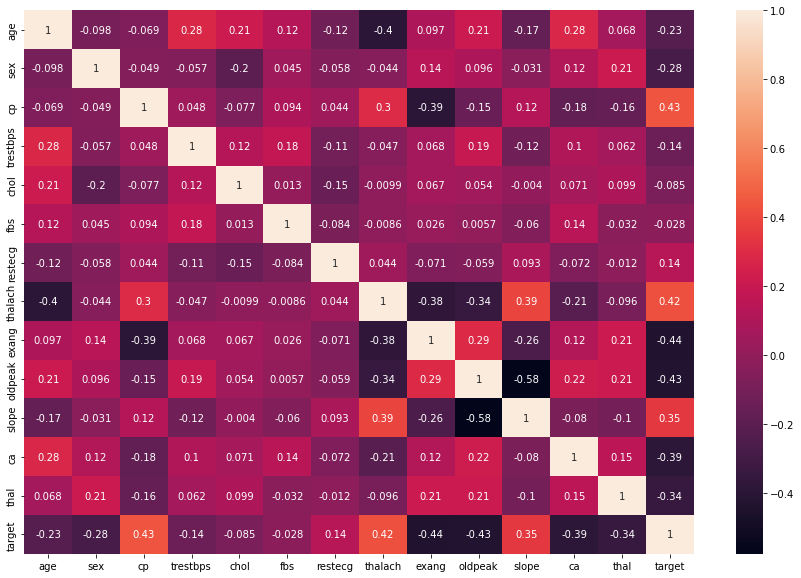

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Key Points:-
- As the CP value increases the target value increases.
- If someone gets Chest pain during exercise(exang=1) their chance of having heart disease goes down(target=0).

### Building an Model

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Splitting Data into Train and Test.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop('target',axis=1)
y=df['target']

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [29]:
X_train.shape

(242, 13)

In [30]:
y_train.shape

(242,)

### We are going to implement 3 Machine Learning Algorithms:-
1. **Logistic Regression**
2. **K-Nearest Neighbhours Classifier**
3. **Random Forest Classifier**

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_lr=LogisticRegression()

In [33]:
## Fit the model to the data.
model_lr.fit(X_train,y_train)

LogisticRegression()

In [34]:
predictions=model_lr.predict(X_test)

### Evaluating the Model

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
confusion_matrix(y_test,predictions)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [38]:
accuracy_score(y_test,predictions)

0.8852459016393442

### KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [41]:
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [42]:
model.score(X_test,y_test)

0.7540983606557377

In [43]:
predictions=model.predict(X_test)

In [44]:
print(classification_report(y_test,predictions,))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [45]:
confusion_matrix(y_test,predictions)

array([[20,  9],
       [ 6, 26]], dtype=int64)

In [46]:
accuracy_score(y_test,predictions)

0.7540983606557377

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model=RandomForestClassifier( n_estimators=5,criterion='entropy',random_state=0)

In [49]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [51]:
confusion_matrix(y_test,predictions)

array([[20,  9],
       [ 6, 26]], dtype=int64)

In [52]:
accuracy_score(y_test,predictions)

0.7540983606557377

In [53]:
## Trying with gini coefficient.

model=RandomForestClassifier(n_estimators=7,criterion='gini',random_state=0)

In [54]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [55]:
accuracy_score(y_test,predictions)

0.7540983606557377

### From the Above Accuracy Scores we can conclude that Logistic Regression is best model for the Heart Disease Prediction.

### Plot ROC curve.

In [56]:
from sklearn.metrics import plot_roc_curve

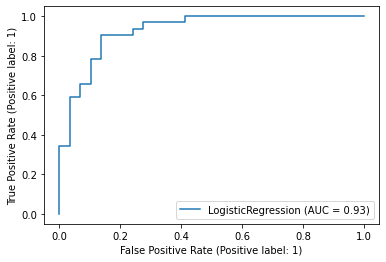

In [57]:
plot_roc_curve(model_lr,X_test,y_test)

### Plot Confusion Matrix through Heatmap.

Text(33.0, 0.5, 'Predicted Label')

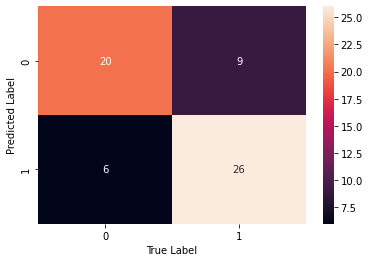

In [58]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

* The confusion matrix shows 20+26 = 46 correct predictions and 6+9= 15 incorrect ones.

* True Positives: 26

* True Negatives: 20

* False Positives: 9

* False Negatives: 6

In [59]:
model.predict(pd.DataFrame(columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','tha'],
                          data=np.array(['63','1','3','145','233','1','0','150','0','2.3','0','0','1']).reshape(1,13)))

array([1], dtype=int64)

* **The model predicts 1 which means that particular person who is Male has Heart Disease.**

### Conclusions:
* **Men seem to be more susceptible to heart disease than women**.
* **If an person has CP( chest pain) he or she may have more likelihood of having Heart Disease**.
* **The model predicted with 0.8852 accuracy. The model is more specific than sensitive**.
 